**Before using this Colab, please save a copy to your own Google Drive: Click on “File” > “Save a copy in Drive”**
#<font size="6" color="#3498DB">
Entity Extraction Framework for Scholarly Knowledge
</font></center>


# **AI Assisted Literature Review Part III**
# *A. Download Research Papers of interest*
# *B. Demo: PDF to TEXT extraction and Named Entity Recognition**



This **Colab notebook** empowers researchers with a powerful toolkit for extracting key entities from **multiple research articles** with a single click. It leverages various APIs and natural language processing techniques to identify essential information.






#**NOTES**

#### **Set the Runtime to Use GPU**
1. Navigate to the **Runtime** menu at the ribbon of the Colab interface.
2. Click on **`Runtime`** > **`Change runtime type`**.
3. In the dialog box, under **`Hardware accelerator`**, select **`GPU`** from the dropdown menu.
4. Click **`Save`**.

#### **Accessing the Files Section**
1. To open the **Files** section, click on the **folder icon** in the sidebar.
2. This will display a file explorer with your current working directory and its contents.

### **Time-taken:approx 3-4 min**
Summarization Completion Time May Vary depending on:
*  Input Length
*  Model Size
* Hardware(CPU vs GPU)
* Internet stability

NOTE: While running Step 3 when Restart the runtime pops up, Click on CANCEL and move to next cell once the installations are done.




**WORKFLOW:**
* Install necessary library to download papers
* Download research paper using *pygetpapers*
* Install necessary library for NER
* Choose the entity for NER (Geolocation, Species, Disease)
* Text extraction from PDFs and extract entities of Interest
* Pearson Correlation within entity
* Create Knowledge Graph

##**Step 1: Install necessary library to download papers**

In [ ]:
!pip install pygetpapers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.4/111.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=e77526000123c5837123a848f993e469dbec7faa487cd09e752b143a182eeae1
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0


##**Step 2: Download research papers using `pygetpapers`.**
User input (title or keywords) to fetch the paper required.**
<br> change the name of the --output folder when you change the query
<br>


In [ ]:
!pygetpapers --query '"lung cancer"' --xml --pdf --limit 100 --output disease --save_query

INFO: Total Hits are 1818
10it [00:00, 76959.71it/s]
INFO: Saving XML files to /content/disease/*/fulltext.xml
  0% 0/10 [00:00<?, ?it/s]INFO: Wrote the pdf file for PMC11621695
INFO: Wrote the pdf file for PMC11621695
 10% 1/10 [00:04<00:36,  4.08s/it]INFO: Wrote the pdf file for PMC11703902
 20% 2/10 [00:04<00:16,  2.02s/it]INFO: Wrote the pdf file for PMC12022001
 30% 3/10 [00:05<00:09,  1.32s/it]INFO: Wrote the pdf file for PMC11145287
INFO: Wrote the pdf file for PMC11145287
 40% 4/10 [00:05<00:06,  1.08s/it]INFO: Wrote the pdf file for PMC11412974
 50% 5/10 [00:06<00:04,  1.17it/s]INFO: Wrote the pdf file for PMC10866695
INFO: Wrote the pdf file for PMC10866695
 60% 6/10 [00:45<00:55, 13.97s/it]INFO: Wrote the pdf file for PMC11665693
 70% 7/10 [00:46<00:28,  9.59s/it]INFO: Wrote the pdf file for PMC10550218
INFO: Wrote the pdf file for PMC10550218
 80% 8/10 [00:46<00:13,  6.69s/it]INFO: Wrote the pdf file for PMC11495393
 90% 9/10 [00:47<00:04,  4.74s/it]INFO: Wrote the pdf file

##**Step 3: Necessary package installation for NER**

In [ ]:
#NOTE: Do not Restart the runtime, Click on CANCEL and move to next cell once the installations are done.

# Install core dependencies
!pip install -q spacy beautifulsoup4 nltk tqdm pymupdf babel pandas rapidfuzz

# Upgrade essential tools
!pip install -U pip setuptools wheel numpy

# Install and download spaCy models
!pip install -U spacy
!python -m spacy download en_core_web_lg

# Install scispaCy and scientific models
!pip install -q scispacy
!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_md-0.5.4.tar.gz
!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bionlp13cg_md-0.5.4.tar.gz

# Download Disease Ontology file (DOID)
!wget -q -O doid.obo http://purl.obolibrary.org/obo/doid.obo
!pip install WordCloud
!pip install seaborn matplotlib
!pip install pyvis --quiet
# Restart the runtime (for changes to take effect)
import os
os.kill(os.getpid(), 9)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 55.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [scispacy]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 MB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DE

##**Step 4: Importing the required modules**

In [ ]:
import os
import re
import fitz  # PyMuPDF
import spacy
import nltk
import requests
import pandas as pd
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
from collections import Counter, defaultdict
from babel import Locale
from IPython.display import display, HTML
from rapidfuzz import process
from functools import lru_cache
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##**Step 5: Entity Extraction**

<br>

**<font size="4" color="#2E86C1">Navigate to Entity Extraction Module of your choice:</font>**

*   [Geolocation Extraction](#geolocation)
*   [Species Extraction](#species)
*   [Disease Extraction](#disease)
*   [Gene/Gene Product Extraction](#gene)

<br>

## <a name="geolocation"></a> Geolocation Extraction


##**Geolocation (Country) extraction and validation**

In [ ]:
#Download NLTK tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

#Load spaCy model
nlp = spacy.load("en_core_web_lg")

folder_path = "/content/disease"  # Your PDF folder

#Helper class to extract COUNTRY names (GPEs)
class CountryExtractor:
    def __init__(self):
        self.global_counts = Counter()
        self.per_pdf_counts = defaultdict(Counter)
        self.all_countries_list = set(Locale('en').territories.values())

    def is_country(self, text):
        return text.strip() in self.all_countries_list

    def extract_from_pdf(self, text, pmcid):
        local_counter = Counter()
        sentences = sent_tokenize(text)
        for sentence in sentences:
            doc = nlp(sentence)
            for ent in doc.ents:
                if ent.label_ == "GPE":
                    country = ent.text.strip()
                    if self.is_country(country):
                        local_counter[country] += 1
                        self.global_counts[country] += 1
        self.per_pdf_counts[pmcid] = local_counter

    def get_combined_dataframe(self):
        df = pd.DataFrame(self.global_counts.items(), columns=["Country", "Frequency"])
        for pmcid, counts in self.per_pdf_counts.items():
            df[pmcid] = df["Country"].map(lambda x: counts.get(x, 0))
        df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)
        df.index += 1  # Start index from 1
        return df

#Extract text from PDF (excluding references)
def extract_text_without_references(pdf_path):
    full_text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            full_text += page.get_text()
    patterns = [
        r'\nReferences\n.*',
        r'\nREFERENCES\n.*',
        r'\nBibliography\n.*',
    ]
    for pattern in patterns:
        full_text = re.split(pattern, full_text, flags=re.DOTALL)[0]
    return full_text.strip()

#Locate PDFs from nested folders
def get_pdf_files(folder_path):
    pdf_files = []
    for dirpath, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.lower() == "fulltext.pdf":
                pdf_files.append(os.path.join(dirpath, filename))
    return pdf_files

pdf_files = get_pdf_files(folder_path)
print(f"✅ Found {len(pdf_files)} PDFs.")

extractor = CountryExtractor()

print("\n🌍 Extracting countries from PDFs...")
for pdf_file in tqdm(pdf_files, desc="Processing PDFs"):
    text = extract_text_without_references(pdf_file)
    if len(text) < 100:
        continue
    pmcid = os.path.basename(os.path.dirname(pdf_file))
    extractor.extract_from_pdf(text, pmcid)

#Create DataFrames
df_all = extractor.get_combined_dataframe()
df_all.to_csv("country_frequency_with_pmc.csv")

# ✅ Top 10 summary
df_top10_main = df_all[["Country", "Frequency"]].head(10)
df_top10_full = df_all.head(10)

# ✅ HTML display with expandable per-PDF columns
html = f"""
<style>
    .collapsible {{ background-color: #4CAF50; color: white; cursor: pointer; padding: 10px; width: 100%; border: none; text-align: left; outline: none; font-size: 16px; border-radius: 5px; }}
    .active, .collapsible:hover {{ background-color: #45a049; }}
    .content {{ display: none; padding: 10px 0; margin-top: 10px; }}
    .content table {{ width: 100%; border-collapse: collapse; }}
    .content th, .content td {{ border: 1px solid #ccc; padding: 5px; text-align: left; }}
</style>

{df_top10_main.to_html(index=True)}

<button class="collapsible">▶ Expand to view per-PDF country mentions</button>
<div class="content">
{df_top10_full.to_html(index=True)}
</div>

<script>
    var coll = document.querySelector(".collapsible");
    var content = document.querySelector(".content");
    coll.onclick = function() {{
        if (content.style.display === "block") {{
            content.style.display = "none";
            coll.innerHTML = "▶ Expand to view per-PDF country mentions";
        }} else {{
            content.style.display = "block";
            coll.innerHTML = "▼ Hide per-PDF country mentions";
        }}
    }};
</script>
"""

# ✅ Show HTML output
display(HTML(html))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_lg' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


✅ Found 95 PDFs.

🌍 Extracting countries from PDFs...


Processing PDFs: 100%|██████████| 95/95 [04:46<00:00,  3.02s/it]


,Country,Frequency
1,China,316
2,Australia,58
3,Japan,49
4,France,33
5,Netherlands,31
6,Germany,25
7,Poland,25
8,Spain,23
9,Italy,19
10,Hungary,19


##**Visualise Country Frequencies with Word Cloud**

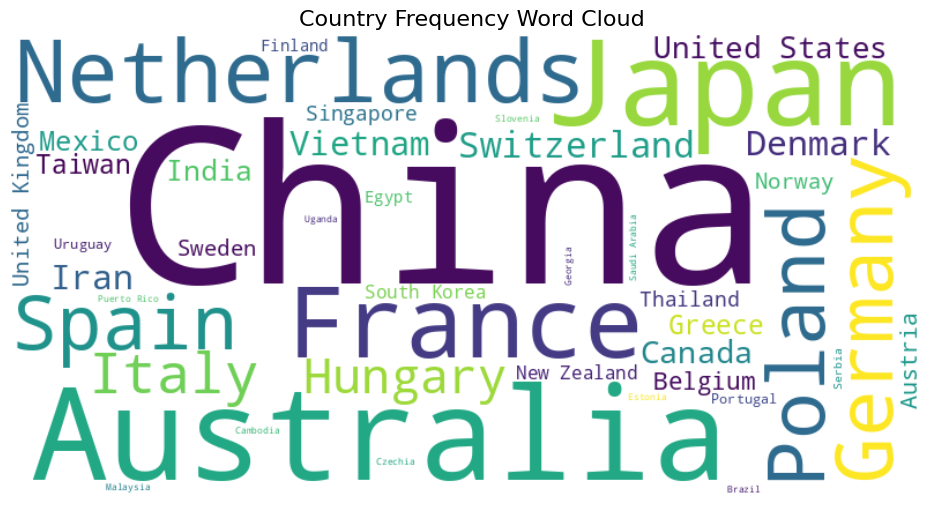

In [ ]:
# Replace 'country_frequency.csv' with the actual filename if it's different
df = pd.read_csv('/content/country_frequency_with_pmc.csv')

# Convert the DataFrame into a dictionary: {Country: Frequency}
freq_dict = dict(zip(df['Country'], df['Frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Country Frequency Word Cloud', fontsize=16)
plt.show()

##**Co-occurrence Plot of Countries**

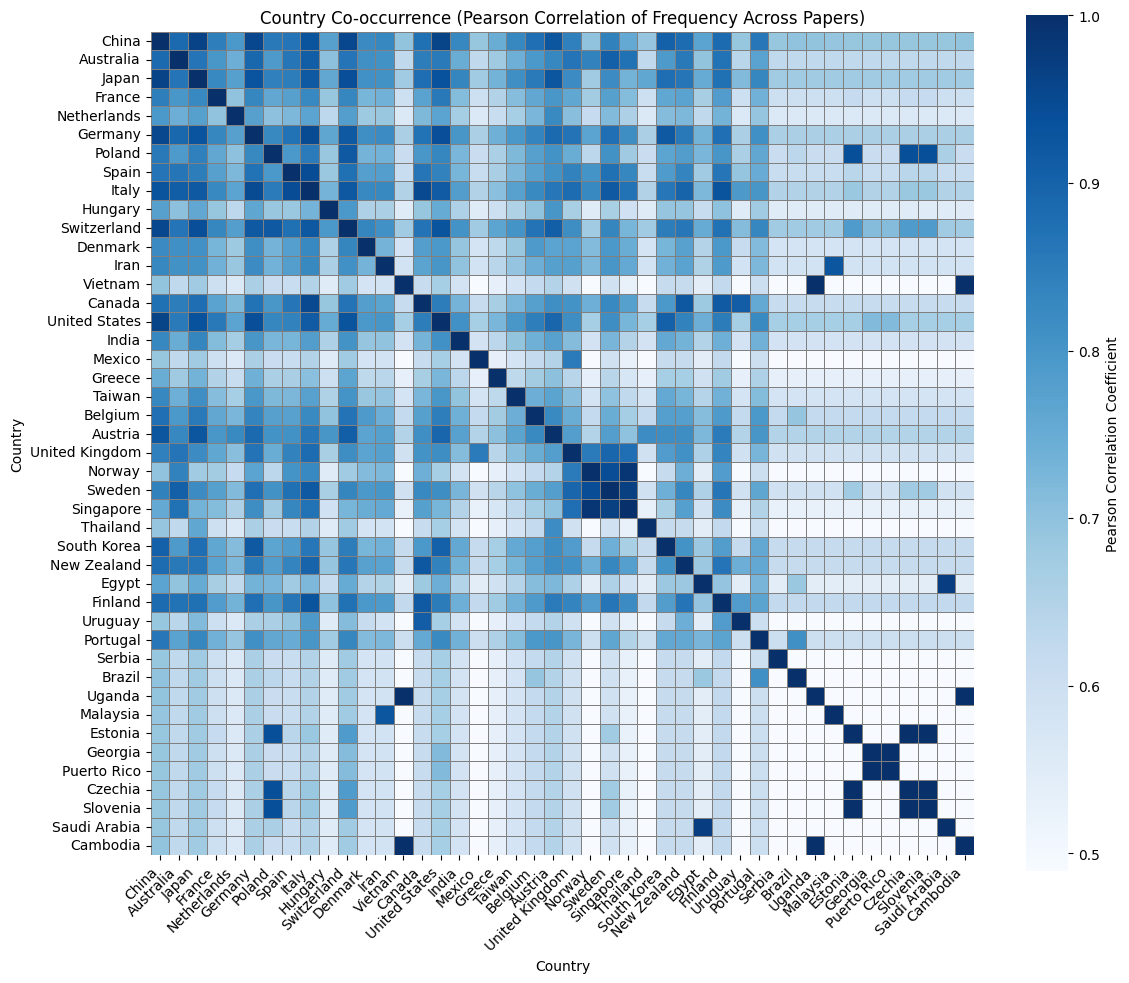

In [ ]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
file_path = 'country_frequency_with_pmc.csv'  # Update with your actual CSV path
df = pd.read_csv(file_path)

# Extract only the country and PMCID columns (skip total frequency)
country_names = df['Country']
frequency_matrix = df.iloc[:, 2:]

# Set the index to country names for correlation
frequency_matrix.index = country_names

# Compute Pearson correlation between countries
correlation_matrix = frequency_matrix.T.corr(method='pearson')

# Plotting heatmap with gridlines
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', square=True,
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Country Co-occurrence (Pearson Correlation of Frequency Across Papers)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## <a name="species"></a> Species Extraction

##**Species extraction and validation**

In [ ]:
#NLTK setup
nltk.download("punkt")
nltk.download('punkt_tab')


#Load SciSpaCy model
nlp = spacy.load("en_core_sci_md")

folder_path = "/content/disease"  # Replace with your folder path

#GBIF species validation
def is_valid_species_gbif(name):
    try:
        response = requests.get(
            "https://api.gbif.org/v1/species/match",
            params={"name": name},
            timeout=5
        )
        if response.status_code == 200:
            data = response.json()
            return data.get("matchType") == "EXACT" and data.get("rank") == "SPECIES"
        return False
    except Exception as e:
        print(f"GBIF error for '{name}': {e}")
        return False

#Species extractor
class SpeciesExtractor:
    def __init__(self):
        self.global_counts = Counter()
        self.per_pdf_counts = defaultdict(Counter)

    def is_species_format(self, text):
        return bool(re.match(r"^[A-Z][a-z]+ [a-z]+$", text.strip()))

    def extract_from_pdf(self, text, pmcid):
        local_counter = Counter()
        sentences = sent_tokenize(text)
        for sentence in sentences:
            doc = nlp(sentence)
            for ent in doc.ents:
                name = ent.text.strip()
                if self.is_species_format(name) and is_valid_species_gbif(name):
                    local_counter[name] += 1
                    self.global_counts[name] += 1
        self.per_pdf_counts[pmcid] = local_counter

    def get_combined_dataframe(self):
        df = pd.DataFrame(self.global_counts.items(), columns=["Species", "Frequency"])
        for pmcid, counts in self.per_pdf_counts.items():
            df[pmcid] = df["Species"].map(lambda x: counts.get(x, 0))
        df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)
        df.index += 1
        return df

#PDF text extraction without references
def extract_text_without_references(pdf_path):
    full_text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            full_text += page.get_text()
    patterns = [r'\nReferences\n.*', r'\nREFERENCES\n.*', r'\nBibliography\n.*']
    for pattern in patterns:
        full_text = re.split(pattern, full_text, flags=re.DOTALL)[0]
    return full_text.strip()

# ✅ Step 8: Get all PDFs from folder
def get_pdf_files(folder_path):
    pdf_files = []
    for dirpath, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.lower() == "fulltext.pdf":
                pdf_files.append(os.path.join(dirpath, filename))
    return pdf_files

#Run extraction

pdf_files = get_pdf_files(folder_path)

print(f"✅ Found {len(pdf_files)} PDFs.")

extractor = SpeciesExtractor()

print("\n🧬 Extracting species (validated via GBIF)...")
for pdf_file in tqdm(pdf_files, desc="Processing PDFs"):
    text = extract_text_without_references(pdf_file)
    if len(text) < 100:
        continue
    pmcid = os.path.basename(os.path.dirname(pdf_file))
    extractor.extract_from_pdf(text, pmcid)

#Generate tables
df_all = extractor.get_combined_dataframe()
df_all.to_csv("species_frequency_with_pmc.csv")

df_top10_main = df_all[["Species", "Frequency"]].head(10)
df_top10_full = df_all.head(10)

#Expandable HTML display
html = f"""
<style>
    .collapsible {{ background-color: #4CAF50; color: white; cursor: pointer; padding: 10px; width: 100%; border: none; text-align: left; outline: none; font-size: 16px; border-radius: 5px; }}
    .active, .collapsible:hover {{ background-color: #45a049; }}
    .content {{ display: none; padding: 10px 0; margin-top: 10px; }}
    .content table {{ width: 100%; border-collapse: collapse; }}
    .content th, .content td {{ border: 1px solid #ccc; padding: 5px; text-align: left; }}
</style>

{df_top10_main.to_html(index=True)}

<button class="collapsible">▶ Expand to view per-PDF species mentions</button>
<div class="content">
{df_top10_full.to_html(index=True)}
</div>

<script>
    var coll = document.querySelector(".collapsible");
    var content = document.querySelector(".content");
    coll.onclick = function() {{
        if (content.style.display === "block") {{
            content.style.display = "none";
            coll.innerHTML = "▶ Expand to view per-PDF species mentions";
        }} else {{
            content.style.display = "block";
            coll.innerHTML = "▼ Hide per-PDF species mentions";
        }}
    }};
</script>
"""

#Display results
display(HTML(html))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


✅ Found 95 PDFs.

🧬 Extracting species (validated via GBIF)...


Processing PDFs: 100%|██████████| 95/95 [34:08<00:00, 21.56s/it]


,Species,Frequency
1,Olea europaea,43
2,Homo sapiens,5
3,Talaromyces marneffei,4
4,Escherichia coli,4
5,Bacteroides salyersiae,4
6,Caragana jubata,3
7,Bacteroides coprocola,3
8,Candida albicans,2
9,Burkholderia cepacia,2
10,Areca catechu,2


##**Visualise Species Frequencies with Word Cloud**

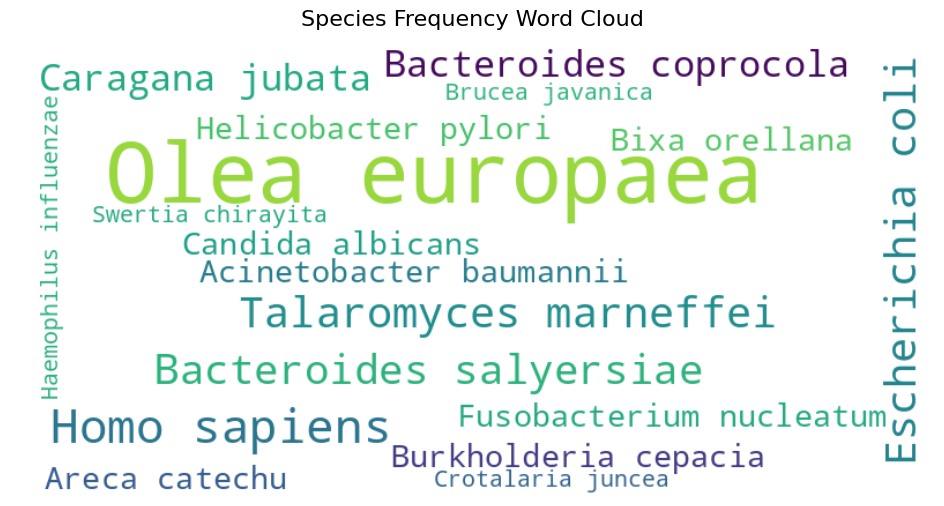

In [ ]:
# Replace 'species_frequency_with_pmc.csv' with the actual filename if it's different
df = pd.read_csv('/content/species_frequency_with_pmc.csv')

# Convert the DataFrame into a dictionary: {Species: Frequency}
freq_dict = dict(zip(df['Species'], df['Frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Species Frequency Word Cloud', fontsize=16)
plt.show()

##**Co-occurrence Plot of Species**

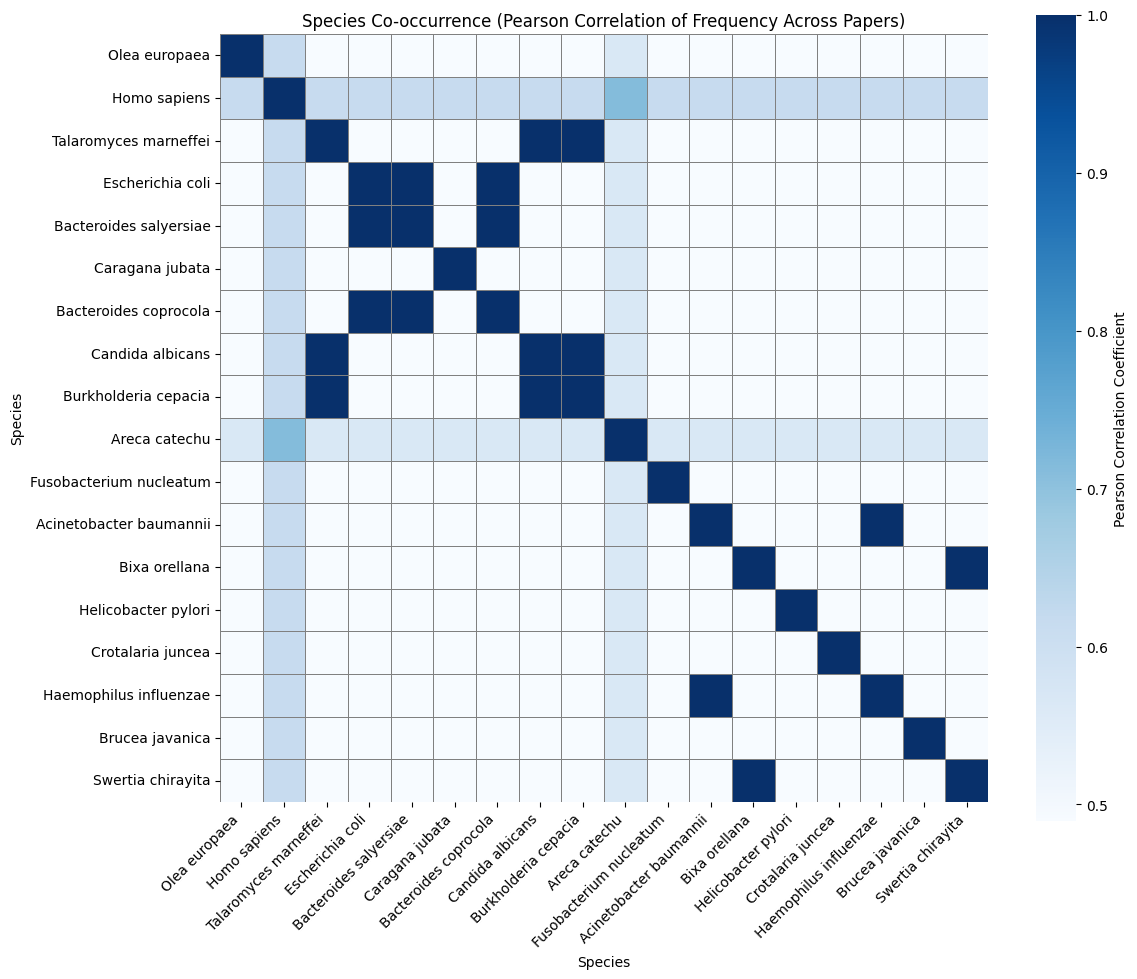

In [ ]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
file_path = 'species_frequency_with_pmc.csv'  # Update with your actual CSV path
df = pd.read_csv(file_path)

# Extract only the species and PMCID columns (skip total frequency)
species_names = df['Species']
frequency_matrix = df.iloc[:, 2:]

# Set the index to species names for correlation
frequency_matrix.index = species_names

# Compute Pearson correlation between species
correlation_matrix = frequency_matrix.T.corr(method='pearson')

# Plotting heatmap with gridlines
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', square=True,
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Species Co-occurrence (Pearson Correlation of Frequency Across Papers)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## <a name="disease"></a> Disease Extraction

##**Disease extraction and validation**

In [ ]:

folder_path = "/content/disease"  # Change to your PDF folder path

#Load Disease Ontology terms from doid.obo
def load_disease_terms(obo_path):
    diseases = set()
    with open(obo_path, 'r', encoding='utf-8') as f:
        for line in f:
            if line.startswith('name: '):
                diseases.add(line.strip().split('name: ')[1].lower())
            elif line.startswith('synonym: '):
                parts = line.strip().split('"')
                if len(parts) > 1:
                    diseases.add(parts[1].lower())
    return diseases

DISEASE_TERMS = load_disease_terms('doid.obo')

# Stopwords and blacklist to filter common false positives
STOPWORDS = set([
    "disease", "syndrome", "disorder", "infection","virus", "human",
    "condition", "patient", "treatment", "therapy", "symptom", "clinical",
    "case", "effect", "study", "result", "analysis", "group", "control"
])

def clean_entity(ent):
    ent = ent.lower().strip()
    if len(ent) < 3:
        return None
    if any(char.isdigit() for char in ent):
        return None
    if re.search(r'[^a-z\s\-]', ent):  # allow letters, spaces, hyphens only
        return None
    if ent in STOPWORDS:
        return None
    return ent

# Cache fuzzy matching results for speed
@lru_cache(maxsize=10000)
def cached_fuzzy_match(name):
    match = process.extractOne(name, DISEASE_TERMS, score_cutoff=95)
    return match is not None

def is_valid_disease(name):
    name_lower = name.lower()
    if name_lower in DISEASE_TERMS:
        return True
    return cached_fuzzy_match(name_lower)

# Load SciSpaCy disease model
nlp = spacy.load("en_ner_bc5cdr_md")

class DiseaseExtractor:
    def __init__(self):
        self.global_counts = Counter()
        self.per_pdf_counts = defaultdict(Counter)

    def extract_from_pdf(self, text, pmcid):
        local_counter = Counter()
        # Clean text
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        doc = nlp(text)
        # Filter sentences longer than 10 chars
        sentences = [sent.text for sent in doc.sents if len(sent.text) > 10]

        # Batch process sentences
        docs = list(nlp.pipe(sentences, batch_size=50))
        for doc in docs:
            for ent in doc.ents:
                if ent.label_ == "DISEASE":
                    disease = clean_entity(ent.text)
                    if disease and is_valid_disease(disease):
                        local_counter[disease] += 1
                        self.global_counts[disease] += 1

        # Filter entities mentioned more than once per PDF
        filtered_counter = Counter({k: v for k, v in local_counter.items() if v > 1})
        self.per_pdf_counts[pmcid] = filtered_counter

    def get_combined_dataframe(self):
        df = pd.DataFrame(self.global_counts.items(), columns=["Disease", "Frequency"])
        for pmcid, counts in self.per_pdf_counts.items():
            df[pmcid] = df["Disease"].map(lambda x: counts.get(x, 0))
        df = df[df["Frequency"] > 1]  # global frequency filter
        df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)
        df.index += 1
        return df

def extract_text_without_references(pdf_path):
    full_text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            full_text += page.get_text()
    patterns = [r'\nReferences\n.*', r'\nREFERENCES\n.*', r'\nBibliography\n.*']
    for pattern in patterns:
        full_text = re.split(pattern, full_text, flags=re.DOTALL)[0]
    return full_text.strip()

def get_pdf_files(folder_path):
    pdf_files = []
    for dirpath, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.lower() == "fulltext.pdf":
                pdf_files.append(os.path.join(dirpath, filename))
    return pdf_files

# === Run extraction ===

pdf_files = get_pdf_files(folder_path)


extractor = DiseaseExtractor()

print("\n🦠 Extracting diseases (optimized)...")
for pdf_file in tqdm(pdf_files, desc="Processing PDFs"):
    text = extract_text_without_references(pdf_file)
    if len(text) < 100:
        continue
    pmcid = os.path.basename(os.path.dirname(pdf_file))
    extractor.extract_from_pdf(text, pmcid)

df_all = extractor.get_combined_dataframe()
df_all.to_csv("disease_frequency_with_pmc.csv")

df_top10_main = df_all[["Disease", "Frequency"]].head(10)
df_top10_full = df_all.head(10)

html = f"""
<style>
    .collapsible {{ background-color: #4CAF50; color: white; cursor: pointer; padding: 10px; width: 100%; border: none; text-align: left; outline: none; font-size: 16px; border-radius: 5px; }}
    .active, .collapsible:hover {{ background-color: #45a049; }}
    .content {{ display: none; padding: 10px 0; margin-top: 10px; }}
    .content table {{ width: 100%; border-collapse: collapse; }}
    .content th, .content td {{ border: 1px solid #ccc; padding: 5px; text-align: left; }}
</style>

{df_top10_main.to_html(index=True)}

<button class="collapsible">▶ Expand to view per-PDF disease mentions</button>
<div class="content">

{df_top10_full.to_html(index=True)}
</div>

<script>
    var coll = document.querySelector(".collapsible");
    var content = document.querySelector(".content");
    coll.onclick = function() {{
        if (content.style.display === "block") {{
            content.style.display = "none";
            coll.innerHTML = "▶ Expand to view per-PDF disease mentions";
        }} else {{
            content.style.display = "block";
            coll.innerHTML = "▼ Hide per-PDF disease mentions";
        }}
    }};
</script>
"""

display(HTML(html))



🦠 Extracting diseases (optimized)...


Processing PDFs: 100%|██████████| 95/95 [04:26<00:00,  2.80s/it]


,Disease,Frequency
1,lung cancer,5282
2,cancer,1643
3,nsclc,817
4,copd,285
5,non-small cell lung cancer,133
6,lung adenocarcinoma,124
7,adenocarcinoma,121
8,asthma,113
9,anxiety,72
10,diabetes,66


##**Visualise Disease Frequencies with Word Cloud**

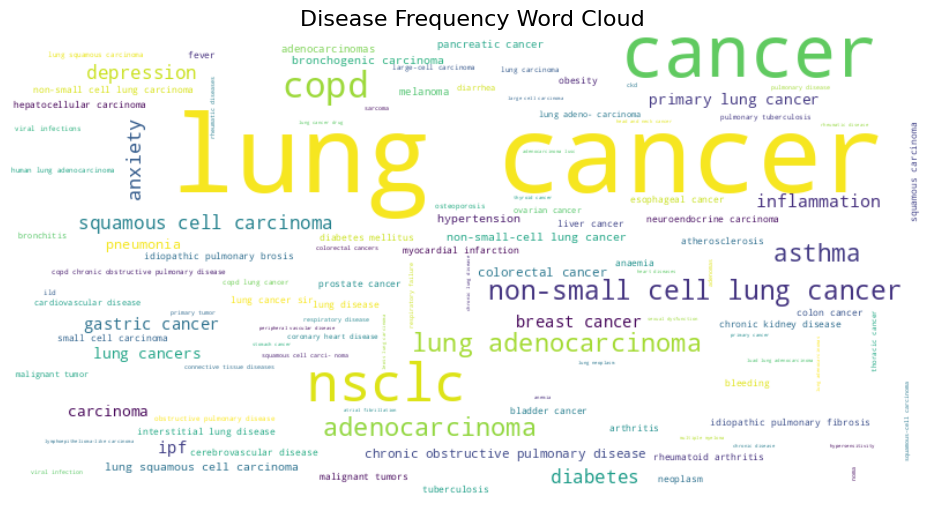

In [ ]:
# Replace 'disease_frequency_with_pmc.csv' with the actual filename if it's different
df = pd.read_csv('/content/disease_frequency_with_pmc.csv')

# Convert the DataFrame into a dictionary: {Species: Frequency}
freq_dict = dict(zip(df['Disease'], df['Frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Disease Frequency Word Cloud', fontsize=16)
plt.show()

##**Co-occurrence Plot of Disease**

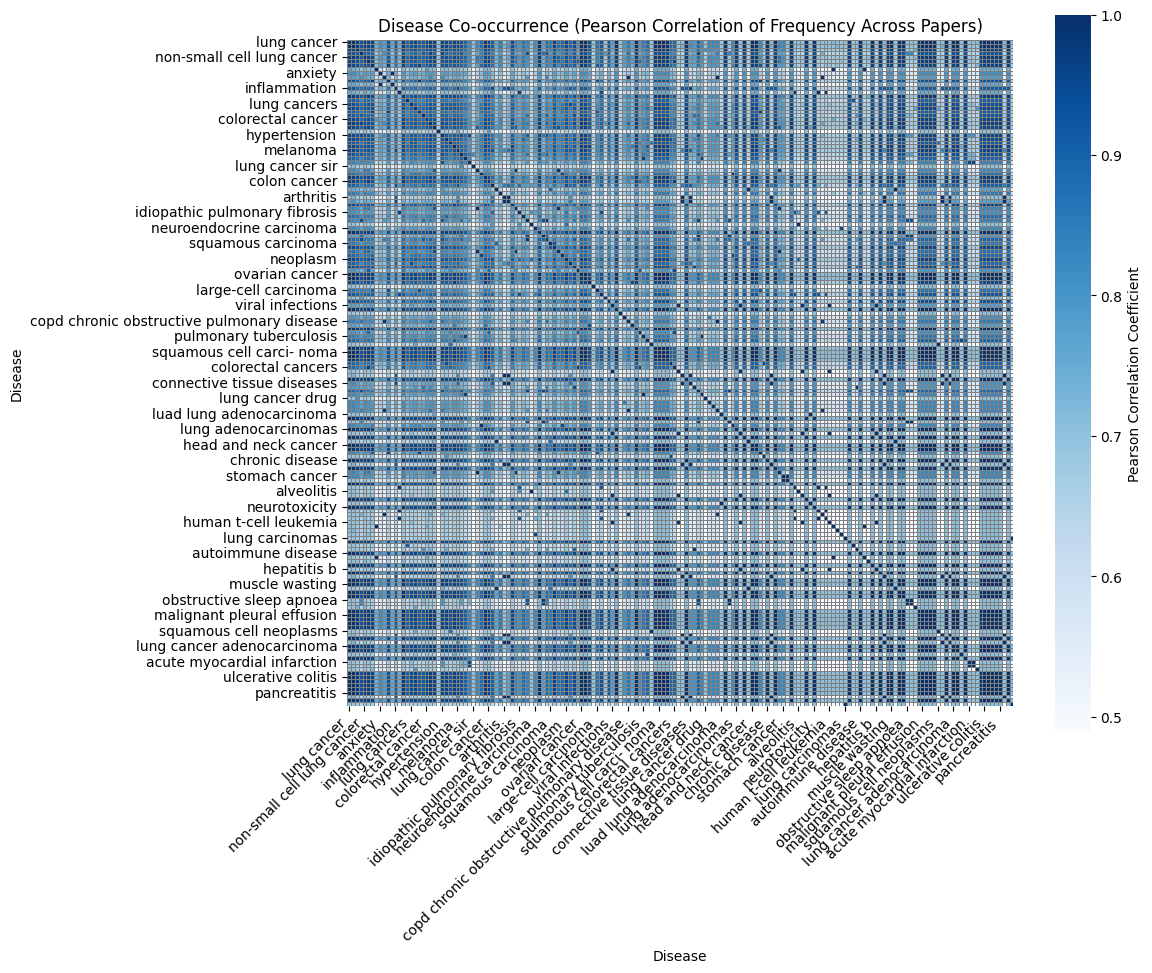

In [ ]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
file_path = 'disease_frequency_with_pmc.csv'  # Update with your actual CSV path
df = pd.read_csv(file_path)

# Extract only the disease and PMCID columns (skip total frequency)
disease_names = df['Disease']
frequency_matrix = df.iloc[:, 2:]

# Set the index to disease names for correlation
frequency_matrix.index = disease_names

# Compute Pearson correlation between diseases
correlation_matrix = frequency_matrix.T.corr(method='pearson')

# Plotting heatmap with gridlines
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', square=True,
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Disease Co-occurrence (Pearson Correlation of Frequency Across Papers)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## <a name="gene"></a> Gene/Gene Product Extraction

##**Gene/Gene Product extraction and validation**

In [ ]:


# ── USER CONFIG ───────────────────────────────────────────────────────────────
PDF_FOLDER = "/content/disease"        # Change this to your root PDF directory
HGNC_TSV    = "hgnc_complete_set.txt"  # HGNC download target
SYMBOLS_TXT = "hgnc_gene_symbols.txt"  # Processed one-symbol-per-line
# ──────────────────────────────────────────────────────────────────────────────

# 1. Download & prepare HGNC list if missing
# Updated URL to avoid 404
HGNC_URL = "https://storage.googleapis.com/public-download-files/hgnc/tsv/tsv/hgnc_complete_set.txt"

if not os.path.exists(HGNC_TSV):
    print("Downloading HGNC data…")
    resp = requests.get(HGNC_URL)
    resp.raise_for_status()
    with open(HGNC_TSV, "wb") as f:
        f.write(resp.content)

if not os.path.exists(SYMBOLS_TXT):
    print("Extracting HGNC symbols…")
    df_hgnc = pd.read_csv(HGNC_TSV, sep="\t", usecols=["symbol"])
    df_hgnc["symbol"].str.lower()\
        .dropna()\
        .sort_values()\
        .drop_duplicates()\
        .to_csv(SYMBOLS_TXT, index=False, header=False)

# 2. Load HGNC gene symbols into a set
def load_gene_symbols(path):
    with open(path, 'r', encoding='utf-8') as f:
        return set(sym.strip().lower() for sym in f if sym.strip())

GENE_SYMBOLS = load_gene_symbols(SYMBOLS_TXT)

# 3. Stopwords & cleaning for gene mentions
GENE_STOPWORDS = {
    "expression","level","protein","activity","sequence","region",
    "gene","mutant","domain","mutation","sample","cell","binding",
    "activation","target","site"
}

def clean_gene_entity(ent: str):
    e = ent.lower().strip()
    if len(e) < 2:                   return None
    if any(ch.isdigit() for ch in e):return None
    if re.search(r'[^a-z\-]', e):    return None
    if e in GENE_STOPWORDS:          return None
    return e

@lru_cache(maxsize=10000)
def cached_gene_match(name: str) -> bool:
    return process.extractOne(name, GENE_SYMBOLS, score_cutoff=95) is not None

def is_valid_gene(name: str) -> bool:
    nl = name.lower()
    return nl in GENE_SYMBOLS or cached_gene_match(nl)

# 4. Load SciSpaCy gene NER model
nlp_gene = spacy.load("en_ner_bionlp13cg_md")

# 5. PDF→text (strip References/Bib)
def extract_text_without_references(pdf_path):
    txt = ""
    try:
        with fitz.open(pdf_path) as doc:
            for page in doc:
                txt += page.get_text()
        for pat in (r'\nReferences\n.*', r'\nREFERENCES\n.*', r'\nBibliography\n.*'):
            txt = re.split(pat, txt, flags=re.DOTALL)[0]
    except Exception as e:
        print(f"⚠️ Skipping {pdf_path} due to error: {e}")
        return None
    return txt.strip()

# 6. Find all “fulltext.pdf” under PDF_FOLDER
def get_pdf_files(root):
    files = []
    for dp, _, fns in os.walk(root):
        for fn in fns:
            if fn.lower() == "fulltext.pdf":
                files.append(os.path.join(dp, fn))
    return files

# 7. GeneExtractor class (mirrors your disease script)
class GeneExtractor:
    def __init__(self):
        self.global_counts = Counter()
        self.per_pdf_counts = defaultdict(Counter)

    def extract_from_text(self, text, doc_id):
        local = Counter()
        # normalize whitespace
        txt = re.sub(r'[^\x00-\x7F]+',' ', text)
        txt = re.sub(r'\s+',' ', txt)
        doc = nlp_gene(txt)
        sents = [s.text for s in doc.sents if len(s.text)>10]
        for subdoc in nlp_gene.pipe(sents, batch_size=50):
            for ent in subdoc.ents:
                if ent.label_ == "GENE_OR_GENE_PRODUCT":
                    g = clean_gene_entity(ent.text)
                    if g and is_valid_gene(g):
                        local[g] += 1
                        self.global_counts[g] += 1
        # keep only genes with >1 mention in that PDF
        self.per_pdf_counts[doc_id] = Counter({g:v for g,v in local.items() if v>1})

    def get_dataframe(self):
        df = pd.DataFrame(self.global_counts.items(), columns=["Gene","Frequency"])
        for doc_id, ctr in self.per_pdf_counts.items():
            df[doc_id] = df["Gene"].map(lambda g: ctr.get(g, 0))
        df = (df[df["Frequency"]>1]
                .sort_values("Frequency", ascending=False)
                .reset_index(drop=True))
        df.index += 1
        return df

# ── RUN THE EXTRACTION ────────────────────────────────────────────────────────
pdfs = get_pdf_files(PDF_FOLDER)
extractor = GeneExtractor()

print("🧬 Extracting genes from PDFs…")
for fn in tqdm(pdfs, desc="PDFs"):
    text = extract_text_without_references(fn)
    if not text or len(text) < 100:
        continue  # skip empty or problematic PDFs
    doc_id = os.path.basename(os.path.dirname(fn))
    extractor.extract_from_text(text, doc_id)

# build & save results
df = extractor.get_dataframe()
df.to_csv("gene_frequency_with_pmc.csv", index=False)

# render top-10 + collapsible breakdown as HTML in notebook
top10      = df[["Gene","Frequency"]].head(10)
top10_full = df.head(10)
html = f"""
<style>
  .collapsible {{ background:#2196F3; color:#fff; padding:8px; border:none;
                  width:100%; text-align:left; font-size:15px; border-radius:4px; }}
  .active, .collapsible:hover {{ background:#1976D2; }}
  .content {{ display:none; margin-top:8px; }}
  .content table {{ width:100%; border-collapse:collapse; }}
  .content th, .content td {{ border:1px solid #ccc; padding:4px; text-align:left; }}
</style>
{top10.to_html(index=True)}
<button class="collapsible">▶ Expand per-PDF breakdown</button>
<div class="content">
{top10_full.to_html(index=True)}
</div>
<script>
  var coll = document.querySelector(".collapsible");
  var cnt  = document.querySelector(".content");
  coll.onclick = function() {{
    if (cnt.style.display === "block") {{
      cnt.style.display = "none";
      coll.textContent = "▶ Expand per-PDF breakdown";
    }} else {{
      cnt.style.display = "block";
      coll.textContent = "▼ Hide per-PDF breakdown";
    }}
  }};</script>
"""
display(HTML(html))


🧬 Extracting genes from PDFs…


PDFs: 100%|██████████| 95/95 [04:24<00:00,  2.79s/it]


,Gene,Frequency
1,egfr,210
2,mtor,104
3,tnf,46
4,alk,34
5,stambp,33
6,cat,30
7,axl,30
8,bax,22
9,flna,22
10,pzp,21


##**Visualise Gene/Gene Product with Word Cloud**

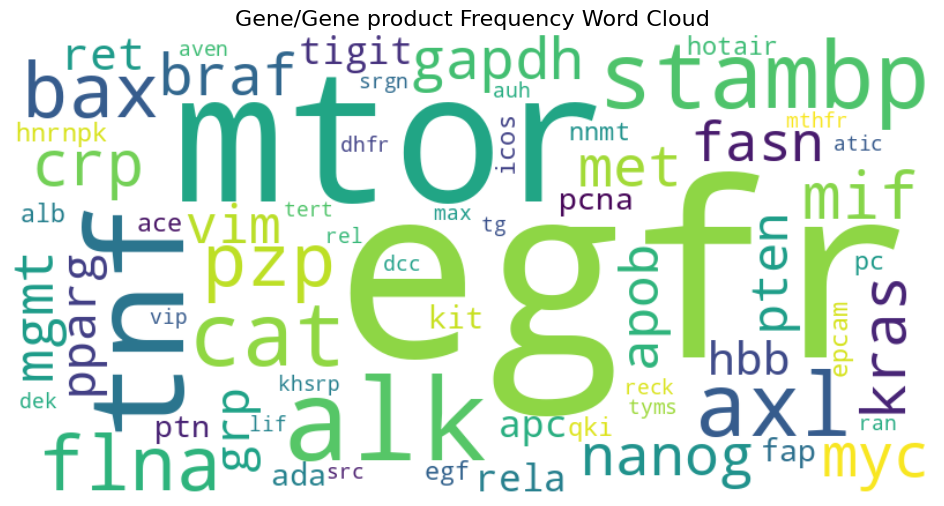

In [ ]:
# Replace 'disease_frequency_with_pmc.csv' with the actual filename if it's different
df = pd.read_csv('/content/gene_frequency_with_pmc.csv')

# Convert the DataFrame into a dictionary: {Species: Frequency}
freq_dict = dict(zip(df['Gene'], df['Frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Gene/Gene product Frequency Word Cloud', fontsize=16)
plt.show()

##**Co-occurrence Plot of Gene/Gene Product**

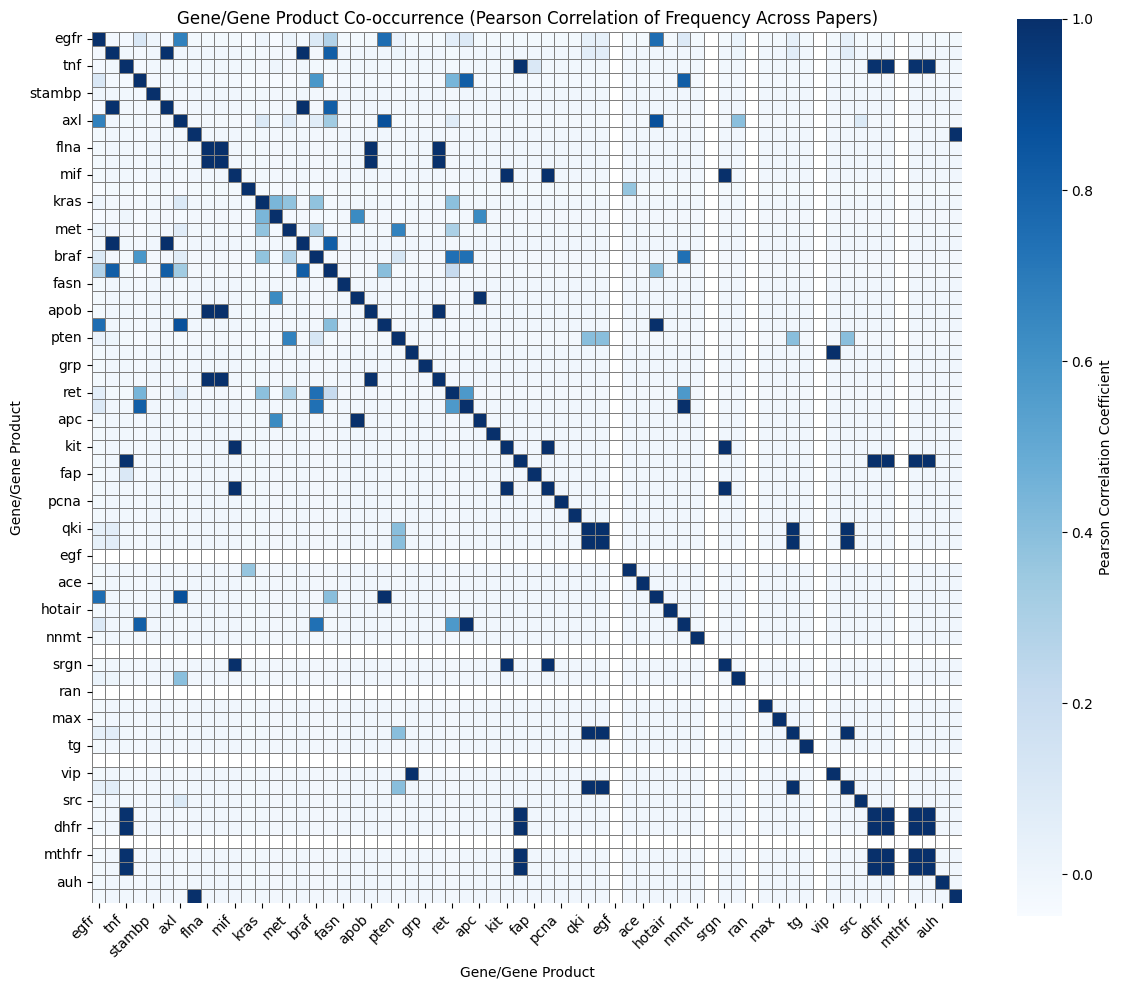

In [ ]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
file_path = 'gene_frequency_with_pmc.csv'  # Update with your actual CSV path
df = pd.read_csv(file_path)

# Extract only the gene and PMCID columns (skip total frequency)
gene_names = df['Gene']
frequency_matrix = df.iloc[:, 2:]

# Set the index to gene names for correlation
frequency_matrix.index = gene_names

# Compute Pearson correlation between genes
correlation_matrix = frequency_matrix.T.corr(method='pearson')

# Plotting heatmap with gridlines
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', square=True,
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Gene/Gene Product Co-occurrence (Pearson Correlation of Frequency Across Papers)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##**Step 9: Network of Countries, Species, Diseases and Genes/Gene Products**

In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML

def create_knowledge_graph(country_csv_path, species_csv_path, disease_csv_path, gene_csv_path):
    countries_df = pd.read_csv(country_csv_path)
    species_df = pd.read_csv(species_csv_path)
    diseases_df = pd.read_csv(disease_csv_path)
    genes_df = pd.read_csv(gene_csv_path)

    graph = nx.Graph()

    pmc_cols_country = countries_df.columns[3:]
    pmc_cols_species = species_df.columns[3:]
    pmc_cols_disease = diseases_df.columns[3:]
    pmc_cols_gene = genes_df.columns[3:]

    for country in countries_df['Country']:
        graph.add_node(country, type='country')

    for species in species_df['Species']:
        graph.add_node(species, type='species')

    for disease in diseases_df['Disease']:
        graph.add_node(disease, type='disease')

    for gene in genes_df['Gene']:
        graph.add_node(gene, type='gene')

    all_pmc_cols = set(pmc_cols_country) | set(pmc_cols_species) | set(pmc_cols_disease) | set(pmc_cols_gene)

    for pmc in all_pmc_cols:
        graph.add_node(pmc, type='pmcid')

        for _, row in countries_df.iterrows():
            country = row['Country']
            weight = row.get(pmc, 0)
            if weight > 0:
                graph.add_edge(pmc, country, type='mentions', weight=weight)

        for _, row in species_df.iterrows():
            species = row['Species']
            weight = row.get(pmc, 0)
            if weight > 0:
                graph.add_edge(pmc, species, type='mentions', weight=weight)

        for _, row in diseases_df.iterrows():
            disease = row['Disease']
            weight = row.get(pmc, 0)
            if weight > 0:
                graph.add_edge(pmc, disease, type='mentions', weight=weight)

        for _, row in genes_df.iterrows():
            gene = row['Gene']
            weight = row.get(pmc, 0)
            if weight > 0:
                graph.add_edge(pmc, gene, type='mentions', weight=weight)

    nodes_to_remove = [node for node, degree in dict(graph.degree()).items() if degree == 0]
    graph.remove_nodes_from(nodes_to_remove)

    return graph

def visualize_knowledge_graph_pyvis(graph):
    net = Network(height="750px", width="100%", bgcolor="#ffffff", font_color="black", notebook=True, cdn_resources='in_line')

    color_map = {
        'country': 'skyblue',
        'species': 'lightgreen',
        'disease': 'lightcoral',
        'gene': 'plum',
        'pmcid': 'lightgray'
    }

    for node, data in graph.nodes(data=True):
        node_type = data.get('type', 'unknown')
        net.add_node(node, label=str(node), title=node_type, color=color_map.get(node_type, 'gray'))

    for source, target, data in graph.edges(data=True):
        net.add_edge(source, target, value=data.get('weight', 1))

    net.force_atlas_2based()
    net.save_graph("knowledge_graph.html")

    # Inject a custom legend in the saved HTML
    legend_html = """
    <div style="position:absolute; top:10px; left:10px; z-index:9999; background-color:white;
                padding:10px; border:1px solid #ccc; border-radius:8px; font-size:16px;">
        <b>Legend</b><br>
        <div style="margin-top:5px;">
            <span style="display:inline-block; width:12px; height:12px; background-color:skyblue; margin-right:6px;"></span>Country<br>
            <span style="display:inline-block; width:12px; height:12px; background-color:lightgreen; margin-right:6px;"></span>Species<br>
            <span style="display:inline-block; width:12px; height:12px; background-color:lightcoral; margin-right:6px;"></span>Disease<br>
            <span style="display:inline-block; width:12px; height:12px; background-color:plum; margin-right:6px;"></span>Gene/Gene Product<br>
            <span style="display:inline-block; width:12px; height:12px; background-color:lightgray; margin-right:6px;"></span>PMCID<br>
        </div>
    </div>
    """

    # Read the file and inject legend
    with open("knowledge_graph.html", "r", encoding="utf-8") as f:
        html_content = f.read()

    html_content = html_content.replace("<body>", f"<body>{legend_html}", 1)

    # Save modified HTML
    with open("knowledge_graph.html", "w", encoding="utf-8") as f:
        f.write(html_content)

    # Display inline in Colab
    display(HTML(html_content))

graph = create_knowledge_graph(
    '/content/country_frequency_with_pmc.csv',
    '/content/species_frequency_with_pmc.csv',
    '/content/disease_frequency_with_pmc.csv',
    '/content/gene_frequency_with_pmc.csv'
)

visualize_knowledge_graph_pyvis(graph)


## References and Acknowledgements

- [pygetpapers](https://github.com/petermr/pygetpapers)

## Contact
semanticclimate@gmail.com